In [1]:
%matplotlib inline

# Filters in Image processing
Edge operators are used in image processing within edge detection algorithms.
They are discrete differentiation operators, computing an approximation of the
gradient of the image intensity function.


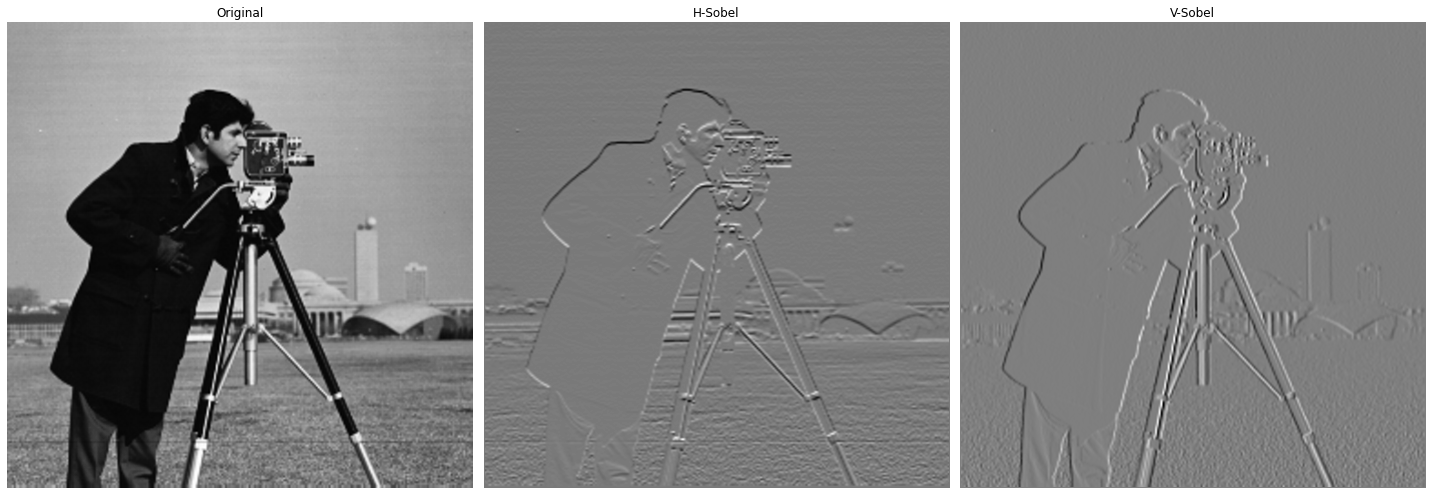

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from skimage.data import camera
from skimage.filters import sobel_h, sobel_v

# grab an image
image = camera()

# custom filters
output1 = sobel_h(image) # horizontal edges
output2 = sobel_v(image) # vertical edges

# make some subplots to plot into
fig, (axorig, ax0, ax1) = plt.subplots(ncols=3,figsize=(20,20))

# show various images
axorig.imshow(image, cmap='gray')
axorig.set_title('Original')
axorig.axis('off')

ax0.imshow(output1, cmap=plt.cm.gray)
ax0.set_title('H-Sobel')
ax0.axis('off')

ax1.imshow(output2, cmap=plt.cm.gray)
ax1.set_title('V-Sobel')
ax1.axis('off')

plt.tight_layout()

plt.show()

___
# Image filtering examples with custom kernels
Wikipedia has some interesting examples:
- http://en.wikipedia.org/wiki/Kernel_(image_processing)

In [3]:
from ipywidgets import interact
import ipywidgets as widgets
import copy
import seaborn as sns


k = []
k.append( np.array([[1.0, 1.0, 1.0],
                    [1.0, 1.0, 1.0],
                    [1.0, 1.0, 1.0]]) )

k.append( np.ones((10,10)) )

k.append( np.array([[-1.0, 0.0, 1.0],
                    [-1.0, 0.0, 1.0],
                    [-1.0, 0.0, 1.0]]) )

k.append( np.array([[-1.0, -1.0, -1.0],
                    [ 0.0,  0.0,  0.0],
                    [ 1.0,  1.0,  1.0]]) )

k.append( np.array([[-1.0, -2.0, -1.0],
                    [ 0.0,  0.0,  0.0],
                    [ 1.0,  2.0,  1.0]]) )



from scipy import ndimage

def custom_filter(k_idx):
    
    if k_idx >= len(k):
        k_idx -= len(k)
        filt = copy.deepcopy(k[k_idx])/(np.abs(k[k_idx]).sum())
        cust_image1 = ndimage.convolve(copy.deepcopy(image).astype(np.float), copy.deepcopy(filt), mode='constant', cval=0.0)
        cust_image2 = ndimage.convolve(copy.deepcopy(image).astype(np.float), copy.deepcopy(filt.T), mode='constant', cval=0.0)
        cust_image = np.sqrt(cust_image1**2 + cust_image2**2)
        txt = ' with Gradient'
    else:
        filt = copy.deepcopy(k[k_idx])/(np.abs(k[k_idx]).sum())
        cust_image = ndimage.convolve(image.astype(np.float), filt, mode='constant', cval=0.0)
        txt = ''
        
    cust_image = (cust_image-cust_image.min())/(cust_image.max()-cust_image.min())
    fig, (axorig, axfiltered, axfilt) = plt.subplots(ncols=3,figsize=(15,5))

    axorig.imshow(image, cmap=plt.cm.gray)
    axorig.set_title('Original')
    axorig.axis('off')

    axfiltered.imshow(cust_image, cmap=plt.cm.gray)
    axfiltered.set_title('Custom')
    axfiltered.axis('off')
    
    #axfilt.imshow(filt*255, cmap=plt.cm.gray)
    sns.heatmap(filt, annot=True, ax=axfilt)
    axfilt.set_title('Filter'+txt)
    axfilt.axis('on')
    axfilt.grid(False)

    plt.show()

interact(custom_filter, k_idx=widgets.IntSlider(min=0,max=2*len(k)-1,step=1,value=0),__manual=True)

interactive(children=(IntSlider(value=0, description='k_idx', max=9), Output()), _dom_classes=('widget-interac…

<function __main__.custom_filter(k_idx)>

<div class="document">
</div>
